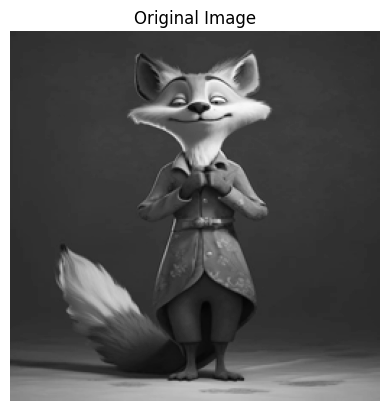

Image shape: (256, 256)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to grayscale
image_path = 'Ml_image.jpg'  # Replace with the path to your image
img = Image.open(image_path).convert('L')  # 'L' mode converts the image to grayscale

# Resize the image to 256x256 if necessary
img = img.resize((256, 256))

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert the image to a NumPy array
img_array = np.array(img)
print("Image shape:", img_array.shape)


In [ ]:
# Reshape the image into a 2D array (each row is a pixel, each column is a feature)
X = img_array.reshape(-1, 256)  # Reshape to (256, 256)
print("Reshaped Image shape:", X.shape)


Reshaped Image shape: (256, 256)


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the image data
def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    return X_reconstructed

# Try different numbers of principal components
components = [5, 20, 50, 100]
reconstructed_images = []

for n in components:
    X_reconstructed = apply_pca(X, n)
    reconstructed_images.append(X_reconstructed.reshape(256, 256))


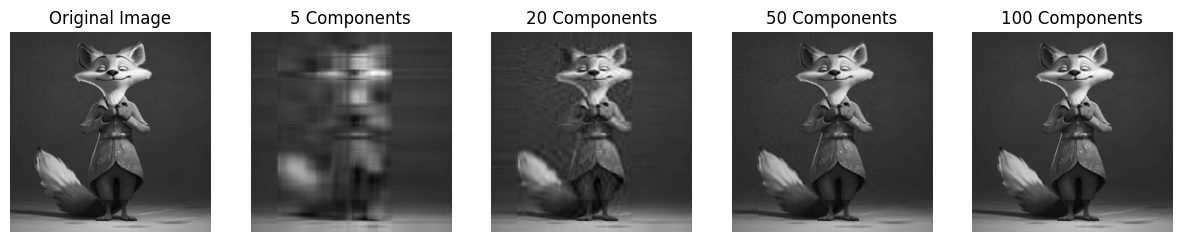

In [ ]:
# Plot the original and reconstructed images
fig, axes = plt.subplots(1, len(components) + 1, figsize=(15, 5))

# Plot original image
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot reconstructed images
for i, (ax, n) in enumerate(zip(axes[1:], components)):
    ax.imshow(reconstructed_images[i], cmap='gray')
    ax.set_title(f'{n} Components')
    ax.axis('off')

plt.show()
